<img src="https://static1.squarespace.com/static/5a3d47364c326d77c53c659d/t/5c3b8d456d2a73d481f72c11/1592871723538/?format=1500w" width="240" height="240" align="center"/>

# Simulation
In this lesson, we are going to simulate a transit of an exoplanet. If you haven't read through Lesson 3 or Lesson 3.1, please do so before proceeding. 

There are three important _parameters_ used in this simulation. A parameter is something that we can adjust in the simulation, and it will change the result.

Recall from Lesson 3, how we use transits to detect exoplanets that are edge-on - meaning they are aligned in such a way that they cast a shadow that momentarily dims the brightness of a star.

To refresh your memory, run the cell below and it will display a video.

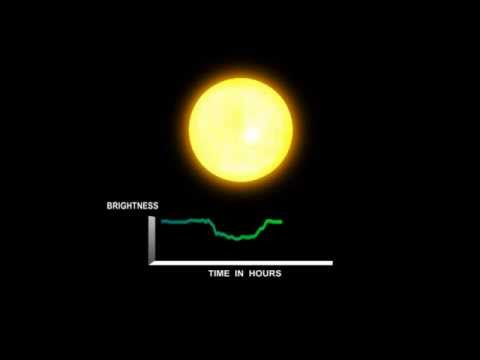

In [1]:
from exoexplorations import *
show_transit_video()

# Light Curves

A light curve is what we look at instead of an image to try and detect a planet. It is the brightness of a star as a function of time, which basically means: _How is the brightness of a star changing with time_. If a star did not have a star with an exoplanet orbiting edge-on, we would expect a regular star's brightness to remain roughly constant (in reality, stars change their brightness all the time, but they usually do it in a different looking way than what we'd expect from an exoplanet). How would we expect its light curve to look? A hint: maybe it would be called a _light flat_. &#128580;


Stars that have an exoplanet orbiting them _do_ create a dip in their light curve. The way this dip looks is the main focus of this lab. 

<img src="http://astronomyonline.org/Exoplanets/Images/transit%20diagram.gif" width="340" align="center"/>

We will explore how a simulated light curve might look by changing three parameters
* Radius of the host star (`star_radius`)
* Radius of the exoplanet (`planet_radius`)
* Where on the star the planet crosses (`inclination`)

These are simulated units, so they are all relative.

Use this picture as a guide:

<img src="simulation.png" width="600" align="center"/>

# So how does this simulation actually work?

Since the simulated units are relative, we should understand what this means. 

You can imagine the simulation as being a matrix of grid cells. That is just a fancy way of imagine the simulation is on graphing paper (sort of like the above drawing).

Now imagine that on this graphing paper, we fill in each grid cell with a number. Now let's draw a large circle on the grid paper. Any grid cells that are touched by the circle, and and grid cells within this circle, get a value of 1. All other grid cells get a value of 0. Let's imagine the circle that has all of the grid cells with 1 in them is our star, and the 1 just means that it is eminating light that we can measure. For this course, we don't care how much light in a physical unit, we just care that it has light. 

Now lets draw another circle, this time for our exoplanet and place it somewhere in our star. Within _this_ circle, assign all grid cells it touches and all contained within it to be 0. 

This is a simulation of how a planet would block out _some_ of the light from the star. The grid cells the planet is in front of do not eminate light (because it's blocked), so they do not get counted.

Now let's add up all of the grid cells that contained light from our star before we put a planet inside. Let's call this $N_{star}$.

Let's now add up all of the grid cells that contained light _after_ we blocked some of it using our pretend planet and call it $N_{planet}$. 

The quantity we are measuring on our light curve is the _fraction of light_, $f$, and we can calculate this by simply dividing the total light after being blocked with the total light before being blocked. Mathematically, it would look like this:

$$f = \frac{N_{planet}}{N_{star}}$$

This quantity goes on the `y-axis` of our simulated light curve.

Ok, now instead of just placing a pretend exoplanet on our grid somwhere, let's pick a spot to start the orbit, calculate $f$, and then pretend the planet moves into a new position of its orbit, and calculate $f$ again.

It we do this a few hundred times, we eventually end up with something that mimics an exoplanet moving in front of a star, and so this is how this simulation works!

# Parameters
In order for the simulation to work correctly, we have to make sure we give it reasonable values. 

For example, the `planet_radius` should not be larger than the `star_radius`. And for the purposes of this simulation, try and keep the `star_radius` < 200 grid cells wide (otherwise we start to run out of computer memory if this is too large, and that's no fun!). 

Finally, to adjust the `inclination`, we must imagine an inclination of 0 as a transit where the exoplanet passes directly through the center of a star. Generally, this isn't _that_ realistic. Note that the inclination can be a _negative value_ meaning that it can pass below the center of the star, too!

The inclination must also be no larger than 200, but you may ask yourself, _what happens if the inclination is greater than the radius of the star?_ Is it still a _light curve_? Do we detect an exoplanet?

# What happens to the light curve when...
* you increase the planet radius and keep the star radius constant?
* you decrease the planet radius and keep the star radius constant?
* you increase or decrease the inclination gradually from 0?
* when the star radius and planet radius are identical?

In [2]:
# adjust the planet and the star's radius

planet_radius, star_radius = 20, 100
inclination = 30

In [3]:
simulate(planet_radius, star_radius, inclination)